<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Pandas---Data-Processing-Example" data-toc-modified-id="Pandas---Data-Processing-Example-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Pandas - Data Processing Example</a></span><ul class="toc-item"><li><span><a href="#Ingesting-data" data-toc-modified-id="Ingesting-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Ingesting data</a></span></li><li><span><a href="#Looking-at-your-data" data-toc-modified-id="Looking-at-your-data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Looking at your data</a></span></li><li><span><a href="#Curating-your-data" data-toc-modified-id="Curating-your-data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Curating your data</a></span></li></ul></li></ul></div>

<b>If you are using google colab you should save this notebook and any associated textfiles to their own folder on your google drive. Then you will need to adapt the following commands so that the notebook runs from the location of that folder. This is only necessary for the brief section on reading text files into Python.</b>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

# Colab command to navigate to the folder holding the homework,
# CHANGE FOR YOUR SPECIFIC FOLDER LOCATION IN GOOGLE DRIVE
# Note: if there are spaces in the path, you need to preceed them with a backslash '\'
%cd /content/drive/My\ Drive/CHE597/Lectures/3-Pandas

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/CHE597/Lectures/3-Pandas




## Pandas - Data Processing Example 
In the current notebook I've supplied IR spectra for some organic molecules, which we'll use to demonstrate some elementary data ingestion and curation activities with Pandas. The goal of this demonstration is to reinforce what we've already learned about numpy and visualization while reinforcing how they interact with Pandas in a typical workflow.  

### Ingesting data
The first thing is to take a look at the files that I have given you and to determine whether you will need to write your own parser or if the data format is compatible with one of the built in parsers from numpy or pandas. In this case, the files are commas separated with a header in the first line, which can be handled with the `pd.read_csv()` function.

In [7]:
import pandas as pd
import numpy as np

# Read in data files to pandas
data = {}
for i in ["1-butanol.csv","diethyl_ether.csv","ethylene.csv","furan.csv"]:
    data[i] = pd.read_csv(i,header=0)
for i in data.keys():
    print("{}:\n{}\n".format(i,data[i]))

1-butanol.csv:
     cm^-1  Intensity
0    450.0      305.0
1    490.0      204.0
2    530.0      443.0
3    570.0      554.0
4    610.0      227.0
..     ...        ...
83  3770.0       92.0
84  3810.0      101.0
85  3850.0      151.0
86  3890.0      107.0
87  3930.0       87.0

[88 rows x 2 columns]

diethyl_ether.csv:
           cm^-1  Intensity
0     386.531000     0.8790
1     391.229523     0.8790
2     395.928046     0.8790
3     400.626569     0.8760
4     405.325091     0.8740
..           ...        ...
722  3778.864505     0.9950
723  3783.563028     0.9940
724  3788.261551     0.9946
725  3792.960074     0.9980
726  3797.658597     0.9980

[727 rows x 2 columns]

ethylene.csv:
           cm^-1  Intensity
0     454.005000     1.0140
1     458.698378     1.0140
2     463.391756     1.0180
3     468.085134     1.0210
4     472.778512     1.0290
..           ...        ...
708  3776.916607     0.9720
709  3781.609985     0.9782
710  3786.303363     0.9790
711  3790.996741     0.

### Looking at your data
The first rule of data analysis is to look at your data. There are a host of common ailments that will jump out at you if you just look at a plot of your data. I can't emphasize how often people spend hours struggling with bad results only to eventually plot the data that they are working with and see that they have outliers, gaps, normalization issues, units problems, inconsistencies across series, etc that they recognize right away in a plot.

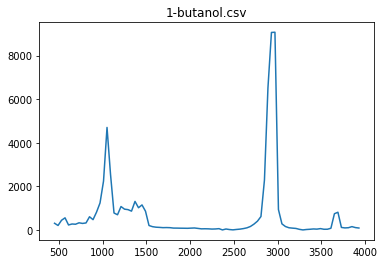

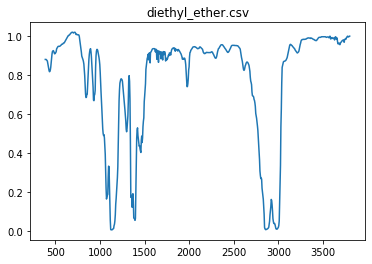

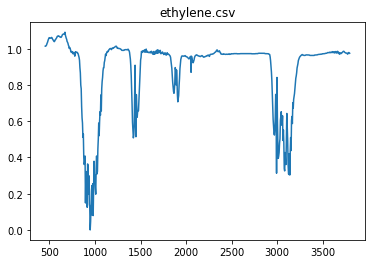

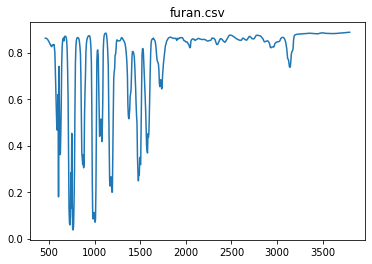

In [8]:
import matplotlib.pyplot as plt
for i in data.keys(): # Loop over the distinct keys in the dictionary 
    plt.figure() # Initialize matplotlib figure
    plt.plot(data[i]["cm^-1"],data[i]["Intensity"]) # Make the current plot
    plt.title(i) # Add title based on the key (i.e., the filename where the data comes from)
plt.show()

As domain experts, we can see that most of our spectra are report a transmittance, while `1-butanol.csv` contains an absorbance. Let's convert `1-butanol.csv` to a transmittance to match the other spectra (<b>Note:</b> the conversion is based on $T = 10^{-A}$ where we also normalize the absorbance to control for thickness):

In [9]:
data['1-butanol.csv']["Intensity"] = 10.0**(-(data['1-butanol.csv']["Intensity"]/data['1-butanol.csv']["Intensity"].max()))
data['1-butanol.csv'] # Display the results

,cm^-1,Intensity
0,450.0,0.925508
1,490.0,0.949540
2,530.0,0.893652
3,570.0,0.868826
4,610.0,0.944013
...,...,...
83,3770.0,0.976920
84,3810.0,0.974691
85,3850.0,0.962399
86,3890.0,0.973208


We are using the built-in pandas display in the previous cell by simply listing the pointer to the dataframe on its own line. These values are looking more like a transmittance. As usual, let's plot it to confirm that it looks sensible:

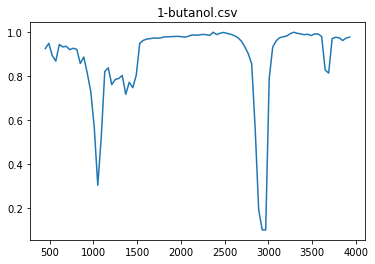

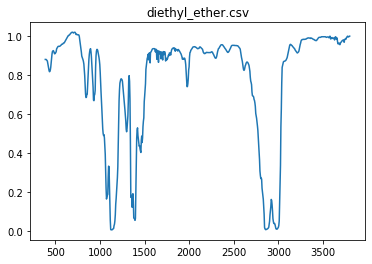

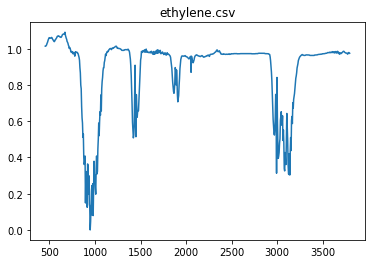

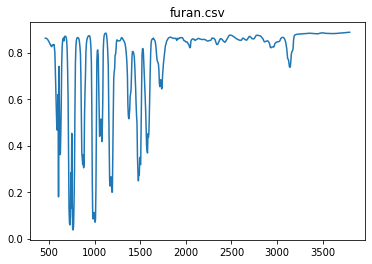

In [10]:
# Check result via plot
for i in data.keys(): # Loop over the distinct keys in the dictionary 
    plt.figure() # Initialize matplotlib figure
    plt.plot(data[i]["cm^-1"],data[i]["Intensity"]) # Make the current plot
    plt.title(i) # Add title based on the key (i.e., the filename where the data comes from)
plt.show()

Now that all of the spectra are in absorbance, what are some other observable differences? Take a second and think about this for yourself. 

Besides the obvious thing that the spectra have different peaks because they correspond to different compounds, I can see two things about the data that might be relevant to some analysis or machine learning applications. First, some of the spectra appear "noisier" than others. I put "noisier" here in quotations because the spectra don't necessarily have distinct measurement uncertainty (they might), but the appearance of noise can also come from the fact that the spectra are reported with different increments of wavenumber. For example:  

In [11]:
# Check the number of values in each dataframe
for i in data.keys():
    print("{}: {}".format(i,len(data[i]["cm^-1"])))

1-butanol.csv: 88
diethyl_ether.csv: 727
ethylene.csv: 713
furan.csv: 668


We can see quite clearly that spectra are not recorded at a consistent spacing in wavenumbers. The second thing that I see is that the spectra have distinct x-ranges, with some recording to higher wavenumbers than others. For example:

In [12]:
# Check the wavenumber range in each dataframe
for i in data.keys():
    print("{}: {}-{} cm^-1".format(i,data[i]["cm^-1"].min(),data[i]["cm^-1"].max()))

1-butanol.csv: 450.0-3930.0 cm^-1
diethyl_ether.csv: 386.531-3797.658597 cm^-1
ethylene.csv: 454.005-3795.690119 cm^-1
furan.csv: 460.0-3795.0 cm^-1


### Curating your data
This kind of data misalignment is very common, and isn't necessarily a problem. However, sometimes we need our data aligned and with a fixed length (e.g., many ML models have these kinds of constraints on input). As part of our example, let's process our data so that all of the spectra are fixed length and at regular wavenumber intervals. To do this we will use one of scipy's interpolation functions:

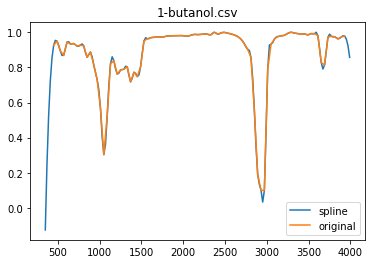

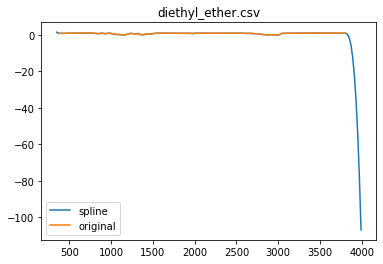

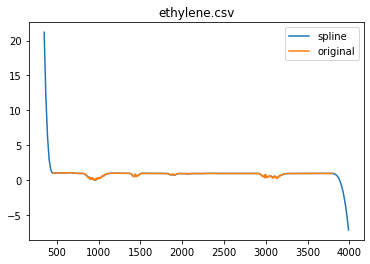

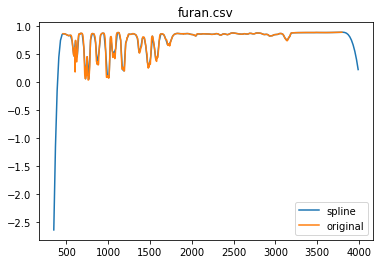

In [13]:
from scipy.interpolate import CubicSpline # Import the interpolation function from scipy
new_x = np.arange(350.,4001.,20) # regularly spaced x-values for our interpolated data.
for i in data.keys(): # loop over the file keys
    spline = CubicSpline(data[i]["cm^-1"],data[i]["Intensity"]) # Check docs for arguments and use, basic is giving it the x and y data
    plt.figure() # Initialize matplotlib figure
    plt.plot(new_x,spline(new_x),label="spline") # Plot the spline interpolated data. We get the y-values by passing the desired x values to the spline object.
    plt.plot(data[i]["cm^-1"],data[i]["Intensity"],label="original") # Plot the original data. Note we put this second, because it makes the agreement more obvious. 
    plt.title(i) # Add title based on the filename
    plt.legend() # Include legend to indicate the spline vs original data
plt.show() # Show the plots. 

We can see that the cubic spline seems to be doing a fair job interpolating the values to the specified wavenumbers, however there is a problem at the ends of the spectra where we've extrapolated rather than interpolated. This is a very common problem with splines. A simple patch is to only use the spline for interpolation, and where the wavenumber range extends beyond the data to use a null value. For example, the implementation below adds a couple lines to handle specifying `np.nan` values where there is no data in the original spectra:

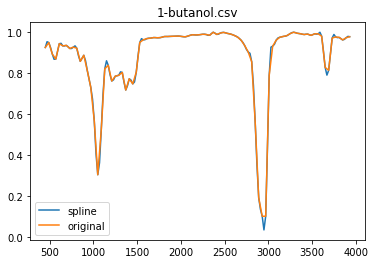

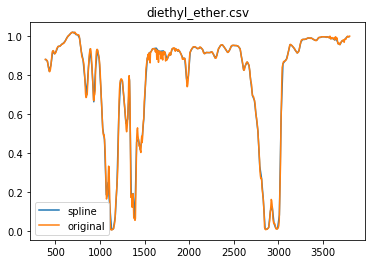

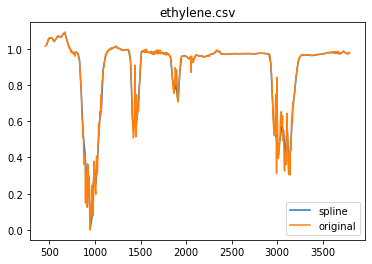

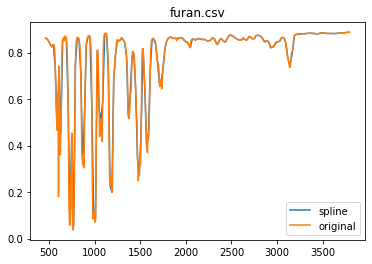

In [14]:
new_x = np.arange(350.,4001.,20)
for i in data.keys():
    spline = CubicSpline(data[i]["cm^-1"],data[i]["Intensity"])
    new_y = spline(new_x) # Get the new y-values. Save to their own array since we will replace some of them. 
    new_y[np.where((new_x<data[i]["cm^-1"].min()) | (new_x>data[i]["cm^-1"].max()))] = np.nan # Replace extrapolated elements with np.nan based on the np.where call.
    plt.figure() 
    plt.plot(new_x,new_y,label="spline")
    plt.plot(data[i]["cm^-1"],data[i]["Intensity"],label="original")
    plt.title(i)
    plt.legend()
plt.show()

<b>Note:</b> in the above cell I have used `(condition A) | (condition B)` in the `np.where` call. Here, the pipe symbol, `|`, means "or". If you wanted to use "and" to specify multiple conditions, then you would use `&`. 

This is looking much more reasonable. We can see some loss in fidelity near some of the peaks, but whether this is a problem depends on the application and is beyond the scope of the current example. There are also other things that we might do during preprocessing of the data, like normalize the y-range, or normalize the area depending on the application.

Now that our preprocessing loop is working, let's combine the interpolated data into a shared dataframe:

In [19]:
new_x = np.arange(350.,4001.,20)
d_new = {} # Initialize a dictionary to hold the interpolated data
for i in data.keys():
    spline = CubicSpline(data[i]["cm^-1"],data[i]["Intensity"])
    new_y = spline(new_x)
    new_y[np.where((new_x<data[i]["cm^-1"].min()) | (new_x>data[i]["cm^-1"].max()))] = np.nan
    d_new[i.split('.')[0]] = new_y # Add the values to the dictionary
df = pd.DataFrame(d_new,index=new_x) # Use the dictionary generated by the loop to initialize the dataframe
df # display the dataframe

,1-butanol,diethyl_ether,ethylene,furan
350.0,NaN,NaN,NaN,NaN
370.0,NaN,NaN,NaN,NaN
390.0,NaN,0.878786,NaN,NaN
410.0,NaN,0.870040,NaN,NaN
430.0,NaN,0.819916,NaN,NaN
...,...,...,...,...
3910.0,0.979775,NaN,NaN,NaN
3930.0,0.978160,NaN,NaN,NaN
3950.0,NaN,NaN,NaN,NaN
3970.0,NaN,NaN,NaN,NaN


Now we have all of the spectra in a shared dataframe, where the wavenumber serves as the index, and the molecular name serves as the column labels. A dataframe like this is often the product of a pre-processing workflow. For example, you might add a few more lines to the code developed in the previous box to automatically ingest data from many files, apply some normalizations, interpolate to specific values, and then combine them into a dataframe for subsequent use.

To check that everything is working, it is useful to plot the data in the dataframe one more time. This also reinforces how matplotlib/pandas/numpy/scipy etc are designed to work with each other, as dataframes have built-in matplotlib visualization methods:

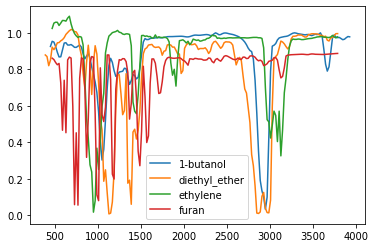

In [20]:
df.plot() # Note how the default behavior interprets columns and labels.